In [1]:
from PIL import Image
import torch
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from point_e.models.download import load_checkpoint
from point_e.models.configs import MODEL_CONFIGS, model_from_config
from point_e.util.pc_to_mesh import marching_cubes_mesh
from point_e.util.plotting import plot_point_cloud
from point_e.util.point_cloud import PointCloud

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print('creating SDF model...')
name = 'sdf'
model = model_from_config(MODEL_CONFIGS[name], device)
model.eval()

print('loading SDF model...')
model.load_state_dict(load_checkpoint(name, device))

creating SDF model...
loading SDF model...


<All keys matched successfully>

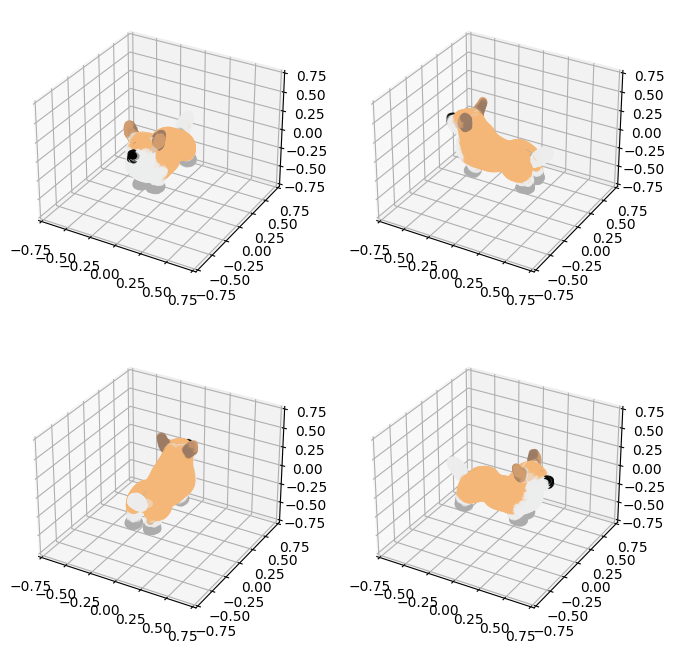

In [3]:
# Load a point cloud we want to convert into a mesh.
pc = PointCloud.load('example_data/pc_corgi.npz')

# Plot the point cloud as a sanity check.
fig = plot_point_cloud(pc, grid_size=2)

In [4]:
# Produce a mesh (with vertex colors)
mesh = marching_cubes_mesh(
    pc=pc,
    model=model,
    batch_size=4096,
    grid_size=32, # increase to 128 for resolution used in evals
    progress=True,
)

  0%|          | 0/8 [00:00<?, ?it/s]

In [7]:
verts, faces, normals = mesh
faces += 1

In [14]:
verts

array([[0.35833028, 0.23032258, 0.3619355 ],
       [0.3619355 , 0.23032258, 0.35286808],
       [0.3619355 , 0.22437908, 0.3619355 ],
       ...,
       [0.65842515, 0.78967744, 0.29612902],
       [0.66308475, 0.78967744, 0.32903227],
       [0.6626736 , 0.78967744, 0.3619355 ]], dtype=float32)

In [8]:
thefile = open('test.obj', 'w')
for item in verts:
  thefile.write("v {0} {1} {2}\n".format(item[0],item[1],item[2]))

for item in normals:
  thefile.write("vn {0} {1} {2}\n".format(item[0],item[1],item[2]))

for item in faces:
  thefile.write("f {0}//{0} {1}//{1} {2}//{2}\n".format(item[0],item[1],item[2]))  

thefile.close()


In [6]:
# Write the mesh to a PLY file to import into some other program.
# with open('mesh.ply', 'wb') as f:
#     mesh.write_ply(f)

In [17]:
verts.size

4755

In [28]:
coords = pc.coords

pc.coords = [[1, 0, 0] + coord for coord in coords]

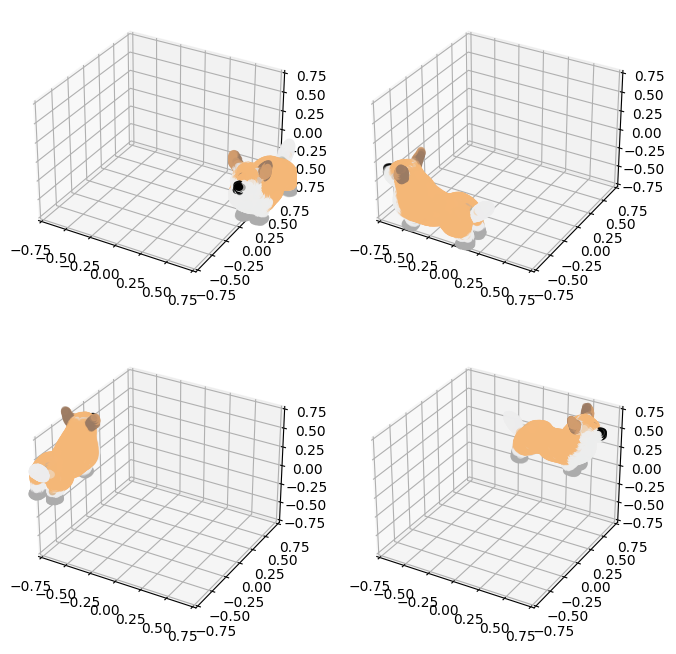

In [31]:
fig = plot_point_cloud(pc, grid_size=2) #interesting shift here...

In [39]:
def shift_pc(pc, shift=1, axis=0):
    shifter_array = [0, 0, 0]
    shifter_array[axis] = shift 

    pc.coords = [shifter_array + coord for coord in pc.coords]

    return pc

In [45]:
shift_pc(pc, shift=-1)

PointCloud(coords=[array([ 0.08699105, -0.17853397,  0.13058445]), array([-0.15392584, -0.25952774, -0.16568671]), array([ 0.11330067,  0.20846088, -0.24513257]), array([-0.1008913 ,  0.35800591, -0.37238136]), array([ 0.12133658, -0.29596001,  0.25905931]), array([0.00602432, 0.47361413, 0.03345774]), array([-0.13661174, -0.31517452, -0.07747509]), array([ 0.1505256 , -0.24889915,  0.35764423]), array([-0.0920409 , -0.3345328 ,  0.10667301]), array([ 0.10731957,  0.01311308, -0.05377394]), array([ 0.09891472, -0.22588758, -0.30296162]), array([ 0.06746921,  0.33342624, -0.38364437]), array([-0.01020986, -0.40033951,  0.0907493 ]), array([ 0.10173224,  0.08289305, -0.18429205]), array([ 0.1533974 , -0.09276054, -0.07858587]), array([-0.07106899,  0.2777817 , -0.29655367]), array([ 0.15406951, -0.23455571, -0.173426  ]), array([ 0.06488051,  0.10226223, -0.21737379]), array([ 0.12194364,  0.21044961, -0.24097589]), array([ 0.13464756, -0.2510936 ,  0.34649774]), array([-0.10577772, -0.2